In [1]:
from itertools import count

In [2]:
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
from sklearn.metrics import mean_squared_error

In [3]:
wdata = pd.read_csv("water_supply.csv")
wdata.head()

,LANDUSE_TYPE,USER,PIPE DIAM,VENDOR,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,H3,MI,0.5,MSDELAUNET,20,20,20,20,20,20,...,2,1,2,1,7,7,42,27,22,21
1,H3,HI,0.5,NAN,20,20,20,20,20,20,...,27,27,27,28,28,31,27,27,27,24
2,H3,MI,0.5,NAN,20,20,20,20,20,20,...,19,19,18,18,19,19,19,18,18,24
3,H3,HI,0.5,NAN,20,20,20,20,20,20,...,17,17,17,17,17,17,17,17,17,24
4,H3,HI,0.5,CICASA MMD-15 S,30,10,30,20,30,30,...,14,15,26,27,29,22,27,26,33,32


In [4]:
wdata.shape

(2017, 88)

In [5]:
cid = int(input('Enter the customer ID: '))

Enter the customer ID: 2


In [6]:
cdata = wdata.iloc[cid][4:]
cdata.head()

2009-01    20
2009-02    20
2009-03    20
2009-04    20
2009-05    20
Name: 2, dtype: object

In [7]:
cdata_as_frame = pd.DataFrame({'Time':cdata.index,'Water':cdata.values})
cdata_as_frame.to_csv('input/testdata.csv',index=False)

In [8]:
data = pd.read_csv("input/testdata.csv")

In [9]:
data.head()

,Time,Water
0,2009-01,20
1,2009-02,20
2,2009-03,20
3,2009-04,20
4,2009-05,20


In [10]:
data_as_frame = pd.DataFrame(data, columns=['Time', 'Water'])
data_as_frame.tail()

,Time,Water
79,2015-08,19
80,2015-09,19
81,2015-10,18
82,2015-11,18
83,2015-12,24


In [11]:
# 4. Lets play with the functions
x = data_as_frame['Time']
Y = data_as_frame['Water']

In [12]:
#Y

In [13]:
window_size= 10
window = np.ones(int(window_size))/float(window_size)

In [14]:
window.shape

(10,)

In [15]:
moving_average = np.convolve(Y, window, 'same')
print(moving_average)

[10.  12.  14.  15.7 17.1 18.1 17.2 16.1 15.6 14.6 13.7 13.6 13.8 15.1
 15.4 17.6 19.  20.3 20.9 22.1 23.8 25.9 26.3 24.4 25.5 25.3 26.6 26.8
 28.5 28.4 27.4 25.4 24.6 25.4 24.1 22.9 20.8 20.1 18.  17.5 17.3 16.9
 16.7 16.3 16.4 16.1 15.9 15.7 14.  13.6 13.1 17.2 17.4 17.7 18.  18.6
 17.1 17.7 19.7 20.8 21.6 17.4 16.9 17.3 17.1 18.  19.9 19.  18.8 18.3
 18.3 18.7 19.2 18.8 19.  17.9 17.9 18.5 18.5 19.1 17.2 15.3 13.5 11.7]


In [16]:
type(moving_average)

numpy.ndarray

In [17]:
avg = moving_average.tolist()
print(avg)

[10.0, 12.0, 14.0, 15.7, 17.1, 18.099999999999998, 17.200000000000003, 16.099999999999998, 15.6, 14.6, 13.700000000000001, 13.600000000000001, 13.8, 15.100000000000001, 15.399999999999999, 17.599999999999998, 19.0, 20.299999999999997, 20.9, 22.099999999999998, 23.8, 25.900000000000002, 26.300000000000004, 24.400000000000006, 25.500000000000004, 25.300000000000004, 26.6, 26.800000000000004, 28.500000000000004, 28.400000000000002, 27.400000000000006, 25.400000000000002, 24.600000000000005, 25.400000000000002, 24.1, 22.900000000000002, 20.800000000000004, 20.099999999999998, 18.0, 17.5, 17.299999999999997, 16.9, 16.7, 16.299999999999997, 16.4, 16.1, 15.899999999999999, 15.7, 14.0, 13.600000000000001, 13.1, 17.2, 17.400000000000002, 17.700000000000003, 18.0, 18.6, 17.1, 17.700000000000003, 19.700000000000003, 20.800000000000004, 21.599999999999998, 17.4, 16.900000000000002, 17.3, 17.1, 18.0, 19.9, 19.0, 18.8, 18.300000000000004, 18.3, 18.7, 19.200000000000003, 18.800000000000004, 19.0, 17.

In [18]:
#residual
residual = Y - avg
print(type(residual))

<class 'pandas.core.series.Series'>


In [19]:
residual.head()

0    10.0
1     8.0
2     6.0
3     4.3
4     2.9
Name: Water, dtype: float64

In [20]:
# Calculate the variation in the distribution of the residual
std = np.std(residual)
std

7.127186281910425

In [21]:
import itertools
sigma = 1

In [22]:
#Calculate the variation in the distribution of the residual
#print(type(residual))
testing_std = residual.rolling(window_size).std()
testing_std_as_df = pd.DataFrame(testing_std)
rolling_std = testing_std_as_df.replace(np.nan,testing_std_as_df.iloc[window_size - 1]).round(3).iloc[:,0].tolist()

In [23]:
rolling_std

[4.336,
 4.336,
 4.336,
 4.336,
 4.336,
 4.336,
 4.336,
 4.336,
 4.336,
 4.336,
 3.918,
 3.72,
 3.21,
 3.204,
 3.073,
 3.013,
 3.046,
 4.692,
 4.792,
 5.691,
 5.584,
 5.512,
 5.847,
 5.63,
 5.376,
 6.865,
 6.933,
 8.398,
 8.307,
 7.59,
 8.41,
 8.314,
 8.981,
 9.116,
 9.464,
 8.219,
 8.248,
 6.382,
 6.48,
 6.467,
 5.358,
 5.36,
 2.228,
 2.105,
 1.388,
 1.234,
 1.009,
 0.986,
 0.75,
 0.848,
 0.976,
 1.285,
 5.708,
 5.829,
 5.986,
 14.384,
 14.38,
 14.369,
 14.379,
 14.38,
 16.02,
 16.096,
 15.031,
 14.885,
 14.53,
 7.648,
 7.833,
 7.957,
 7.952,
 9.001,
 5.083,
 5.685,
 5.652,
 5.332,
 5.278,
 5.221,
 4.644,
 4.575,
 4.517,
 2.222,
 2.323,
 1.204,
 1.65,
 3.853]

In [24]:
avg_list = avg
text_xlabel="Time"
text_ylabel="Consumed Water"
applying_rolling_std=False

Text(0,0.5,'Consumed Water')

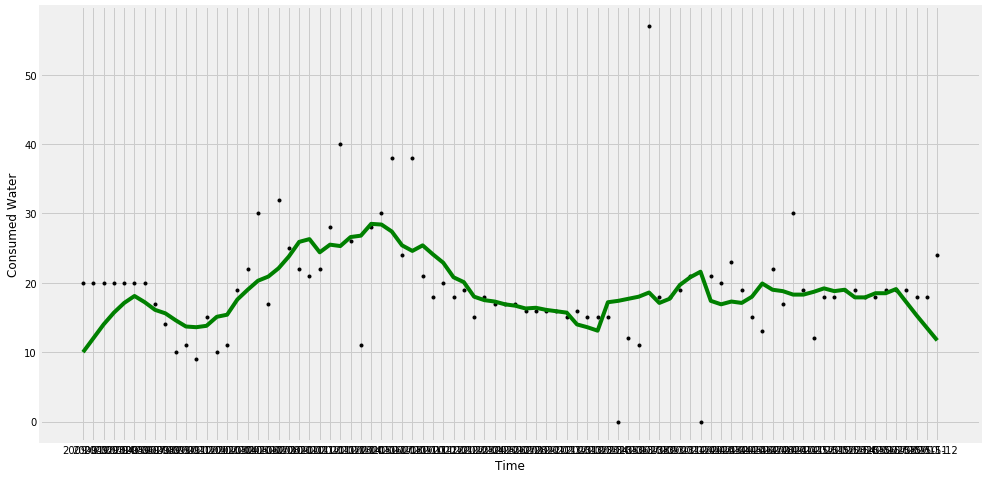

In [25]:
plt.figure(figsize=(15, 8))
plt.plot(x, Y, "k.")
plt.plot(x, moving_average, color='green')
plt.xlabel(text_xlabel)
plt.ylabel(text_ylabel)

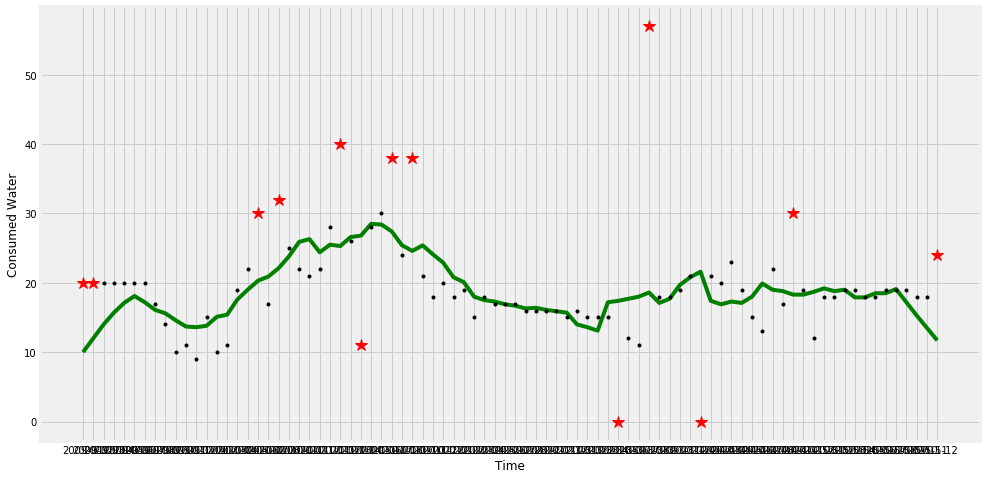

In [26]:
events = {}
if applying_rolling_std:
    events = {'stationary standard_deviation': round(std, 3),'anomalies_dict': collections.OrderedDict([(index, y_i)
                for index, y_i, avg_i, rs_i in zip(count(),Y, avg_list, rolling_std)
                  if (y_i > avg_i + (sigma * rs_i)) | (y_i < avg_i - (sigma * rs_i))])}
else:
    events = {'standard_deviation': round(std, 3),'anomalies_dict': collections.OrderedDict([(index, y_i) for index, y_i, avg_i in zip(count(), Y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}


x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,count=len(events['anomalies_dict']))
plt.figure(figsize=(15, 8))
plt.plot(x, moving_average, color='green')
plt.plot(x, Y, "k.")
plt.xlabel(text_xlabel)
plt.ylabel(text_ylabel)
plt.plot(x_anomaly, y_anomaly, "r*", markersize=12)

# add grid and lines and enable the plot
plt.grid(True)
plt.show()

In [27]:
# Display the anomaly dict
print("Information abfor i in out the anomalies model:{}".format(events))

Information abfor i in out the anomalies model:{'standard_deviation': 7.127, 'anomalies_dict': OrderedDict([(0, 20), (1, 20), (17, 30), (19, 32), (25, 40), (27, 11), (30, 38), (32, 38), (52, 0), (55, 57), (60, 0), (69, 30), (83, 24)])}


# !!! Outlier Detected Successfully !!! #

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
Time     84 non-null object
Water    84 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [29]:
data.describe()

,Water
count,84.000000
mean,19.333333
std,7.834636
min,0.000000
25%,16.000000
50%,18.500000
75%,21.000000
max,57.000000


In [30]:
data.head()

,Time,Water
0,2009-01,20
1,2009-02,20
2,2009-03,20
3,2009-04,20
4,2009-05,20


In [31]:
data.dtypes

Time     object
Water     int64
dtype: object

In [32]:
data['Water'].unique()

array([20, 17, 14, 10, 11,  9, 15, 19, 22, 30, 32, 25, 21, 28, 40, 26, 38,
       24, 18, 16,  0, 12, 57, 23, 13], dtype=int64)

In [33]:
import statsmodels.api as sm
import seaborn as sns

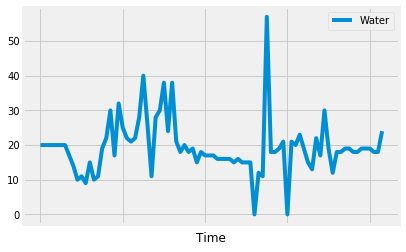

In [34]:
data.plot.line(x = 'Time', y = 'Water')
plt.show()

In [35]:
to_plot_monthly_variation = data
mon = data['Time']
print(mon)

0     2009-01
1     2009-02
2     2009-03
3     2009-04
4     2009-05
5     2009-06
6     2009-07
7     2009-08
8     2009-09
9     2009-10
10    2009-11
11    2009-12
12    2010-01
13    2010-02
14    2010-03
15    2010-04
16    2010-05
17    2010-06
18    2010-07
19    2010-08
20    2010-09
21    2010-10
22    2010-11
23    2010-12
24    2011-01
25    2011-02
26    2011-03
27    2011-04
28    2011-05
29    2011-06
       ...   
54    2013-07
55    2013-08
56    2013-09
57    2013-10
58    2013-11
59    2013-12
60    2014-01
61    2014-02
62    2014-03
63    2014-04
64    2014-05
65    2014-06
66    2014-07
67    2014-08
68    2014-09
69    2014-10
70    2014-11
71    2014-12
72    2015-01
73    2015-02
74    2015-03
75    2015-04
76    2015-05
77    2015-06
78    2015-07
79    2015-08
80    2015-09
81    2015-10
82    2015-11
83    2015-12
Name: Time, Length: 84, dtype: object


In [36]:
temp= pd.DatetimeIndex(mon,)
print(type(temp))
print(temp)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01',
               '2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
               '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05

In [37]:
month = pd.Series(temp.month)
print(month)

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12     1
13     2
14     3
15     4
16     5
17     6
18     7
19     8
20     9
21    10
22    11
23    12
24     1
25     2
26     3
27     4
28     5
29     6
      ..
54     7
55     8
56     9
57    10
58    11
59    12
60     1
61     2
62     3
63     4
64     5
65     6
66     7
67     8
68     9
69    10
70    11
71    12
72     1
73     2
74     3
75     4
76     5
77     6
78     7
79     8
80     9
81    10
82    11
83    12
Name: Time, Length: 84, dtype: int64


In [38]:
to_plot_monthly_variation.head(30)

,Time,Water
0,2009-01,20
1,2009-02,20
2,2009-03,20
3,2009-04,20
4,2009-05,20
5,2009-06,20
6,2009-07,20
7,2009-08,17
8,2009-09,14
9,2009-10,10


In [39]:
to_plot_monthly_variation = to_plot_monthly_variation.drop(['Time'], axis = 1)
to_plot_monthly_variation.tail()

,Water
79,19
80,19
81,18
82,18
83,24


In [40]:
to_plot_monthly_variation = to_plot_monthly_variation.join(month)
to_plot_monthly_variation.head(30)

,Water,Time
0,20,1
1,20,2
2,20,3
3,20,4
4,20,5
5,20,6
6,20,7
7,17,8
8,14,9
9,10,10


In [41]:
data_test= to_plot_monthly_variation[to_plot_monthly_variation['Time'] == 1]['Water']

In [42]:
data_test

0     20
12    15
24    28
36    18
48    16
60     0
72    18
Name: Water, dtype: int64

In [43]:
data_test.mean()

16.428571428571427

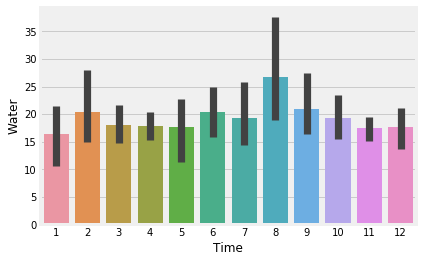

In [44]:
sns.barplot(x = 'Time', y = 'Water', data = to_plot_monthly_variation)
plt.show()

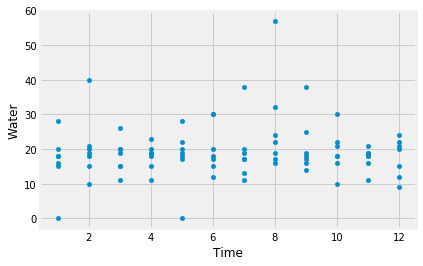

In [45]:
to_plot_monthly_variation.plot.scatter(x = 'Time', y = 'Water')
plt.show()

In [46]:
water= data[['Water']]

In [65]:
water.rolling(6).mean()

,Water
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,20.000000
6,20.000000
7,19.500000
8,18.500000
9,16.833333


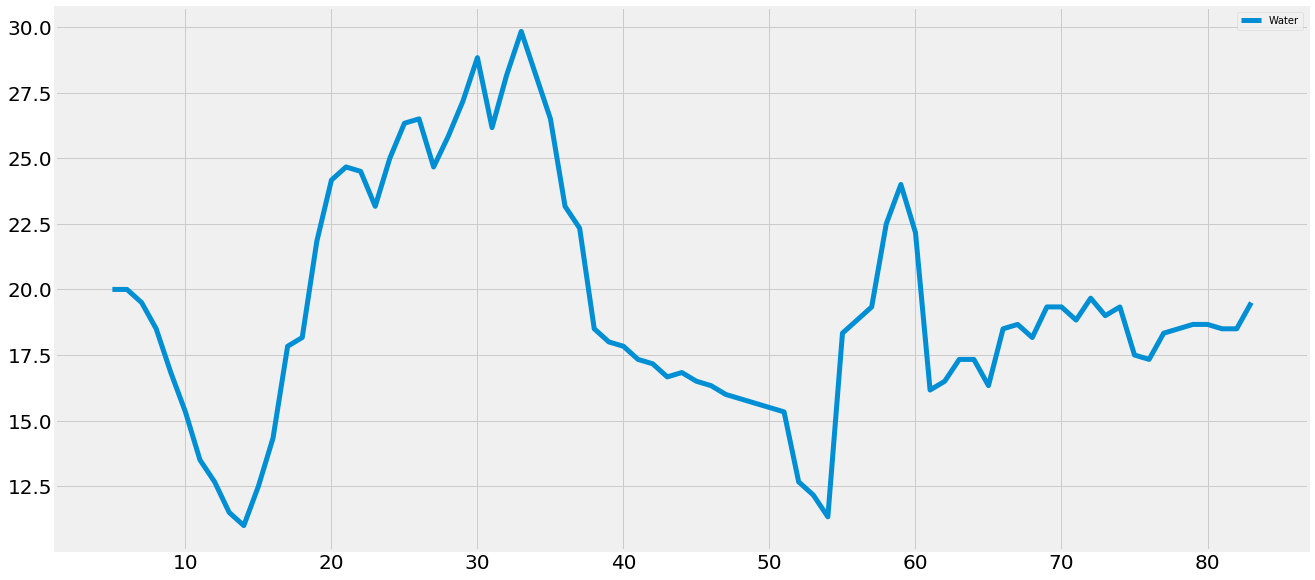

In [61]:
#water= data[['Water']]
water.rolling(6).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

In [67]:
water.diff(periods=4)

,Water
0,NaN
1,NaN
2,NaN
3,NaN
4,0.0
5,0.0
6,0.0
7,-3.0
8,-6.0
9,-10.0


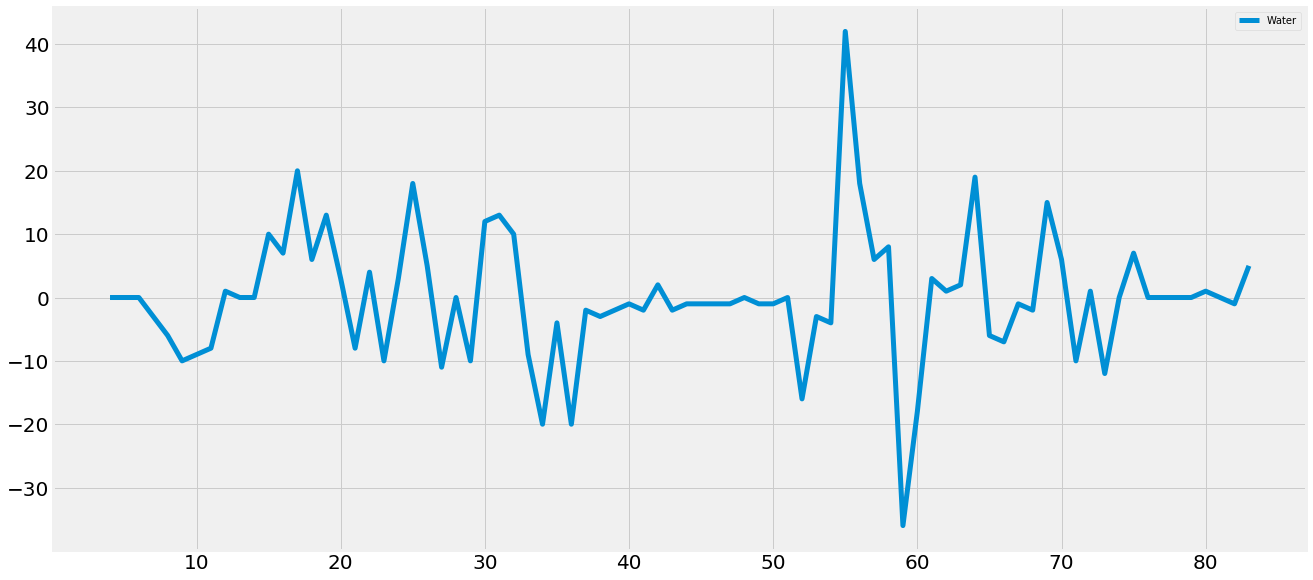

In [50]:
water.diff(periods=4).plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

In [51]:
data

,Time,Water
0,2009-01,20
1,2009-02,20
2,2009-03,20
3,2009-04,20
4,2009-05,20
5,2009-06,20
6,2009-07,20
7,2009-08,17
8,2009-09,14
9,2009-10,10


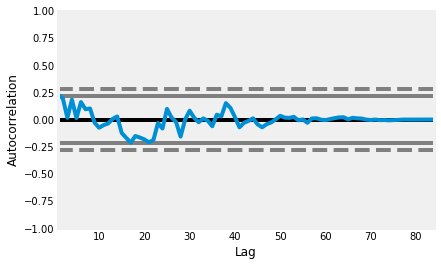

In [52]:
pd.plotting.autocorrelation_plot(data['Water'])
plt.show()

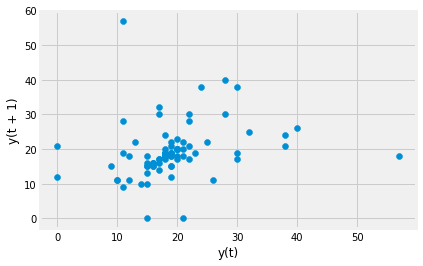

In [53]:
pd.plotting.lag_plot(data['Water'])
plt.show()

In [54]:
data.head()

,Time,Water
0,2009-01,20
1,2009-02,20
2,2009-03,20
3,2009-04,20
4,2009-05,20


In [55]:
input_data = data['Water']
mod = sm.tsa.SARIMAX(input_data, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12), enforce_invertibility=False)

In [56]:
results = mod.fit()

In [70]:
data['forecast'] = results.predict(start = 70, end= 90, dynamic= True)

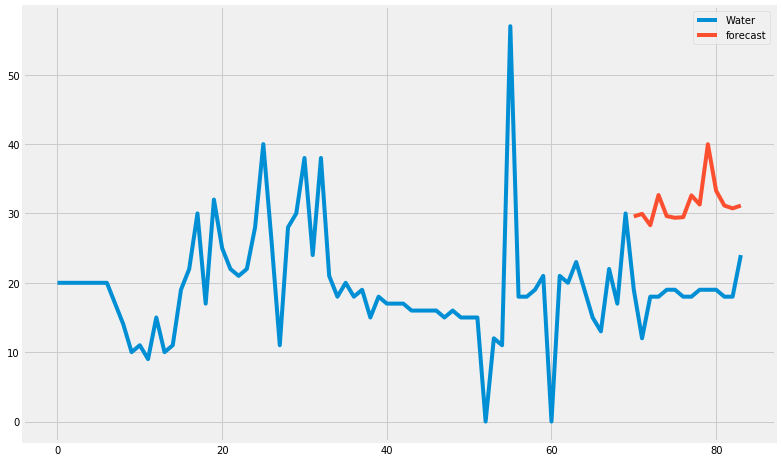

In [71]:
data[['Water', 'forecast']].plot(figsize=(12, 8))
plt.show()

In [59]:
data.tail(10)

,Time,Water,forecast
74,2015-03,19,29.609899
75,2015-04,19,29.378933
76,2015-05,18,29.459548
77,2015-06,18,32.609254
78,2015-07,19,31.285521
79,2015-08,19,39.979078
80,2015-09,19,33.268324
81,2015-10,18,31.142340
82,2015-11,18,30.733202
83,2015-12,24,31.136402


# ! Thank You ! #